In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import urllib
from PIL import Image
from bs4 import BeautifulSoup
import requests
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
movie_df = pd.read_csv("shuffled_movie_df.csv")
movie_df.head()

,Movie Name,Poster Image Link,Synopsis,Genre,IMDb_id,Plot Keywords,Storyline,Genre Variations
0,Big Fish,https://m.media-amazon.com/images/M/MV5BMTYyMz...,A frustrated son tries to determine the fa...,Adventure,tt0319061,fish father son relationship death of father f...,United Press International journalist Will...,Adventure Drama Fantasy
1,Scott Pilgrim vs. the World,https://m.media-amazon.com/images/M/MV5BMTkwNT...,Scott Pilgrim must defeat his new girlfrie...,Action,tt0446029,toronto canada sexy woman cleavage panties sca...,Scott Pilgrim plays in a band which aspire...,Action Comedy Fantasy
2,The Paleface,https://m.media-amazon.com/images/M/MV5BOGZhMG...,Calamity Jane is despatched to find out wh...,Western,tt0040679,comedy of errors misunderstanding punched in t...,Someone is selling guns to the Indians and...,Comedy Family Western
3,How the West Was Won,https://m.media-amazon.com/images/M/MV5BNTk2ND...,A family saga covering several decades of ...,Western,tt0056085,ulysses s. grant character abraham lincoln cha...,Setting off on a journey to the west in th...,Western
4,The Butterfly Effect,https://m.media-amazon.com/images/M/MV5BODNiZm...,Evan Treborn suffers blackouts during sign...,Sci-Fi,tt0289879,love butterfly effect child pornography time t...,Evan Treborn grows up in a small town with...,Drama Sci-Fi Thriller


In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

# Most Common Words in Sci-Fi

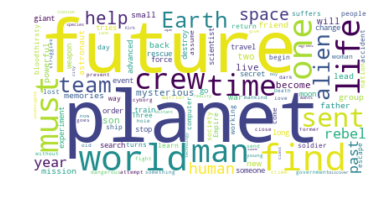

In [4]:
scifi_series = movie_df[movie_df["Genre"] == "Sci-Fi"]
scifi_text=""
for text in scifi_series.Synopsis:
    scifi_text+=text
wordcloud = WordCloud(background_color="white").generate(scifi_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
scifi_movies_df = movie_df[movie_df["Genre"] == "Sci-Fi"]

bag_of_words_scifi = (
    scifi_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_scifi = pd.DataFrame(list(bag_of_words_scifi)).fillna(0)
tf_scifi.sum().sort_values()[-50:]

only            6.0
past            6.0
son             6.0
two             6.0
mysterious      6.0
space           7.0
man             7.0
at              7.0
they            7.0
time            7.0
help            7.0
where           8.0
but             8.0
its             8.0
team            8.0
earth           8.0
him             8.0
crew            9.0
sent            9.0
life           10.0
has            10.0
are            10.0
when           10.0
find           10.0
into           11.0
must           11.0
one            12.0
planet         12.0
who            12.0
future         13.0
world          13.0
for            15.0
by             17.0
with           17.0
as             17.0
he             17.0
after          18.0
on             18.0
their          18.0
from           22.0
that           27.0
is             37.0
his            41.0
an             41.0
and            56.0
in             65.0
of             80.0
to            108.0
the           135.0
a             195.0


According to this TF for Sci-Fi movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the Sci-Fi movie sysnopsis are: "world", "future", "planet", "crew", "earth", "time", "space", "past", "team"

Common Sci-Fi Synopsis Words: future, planet, world, crew, earth, time,space, past, team


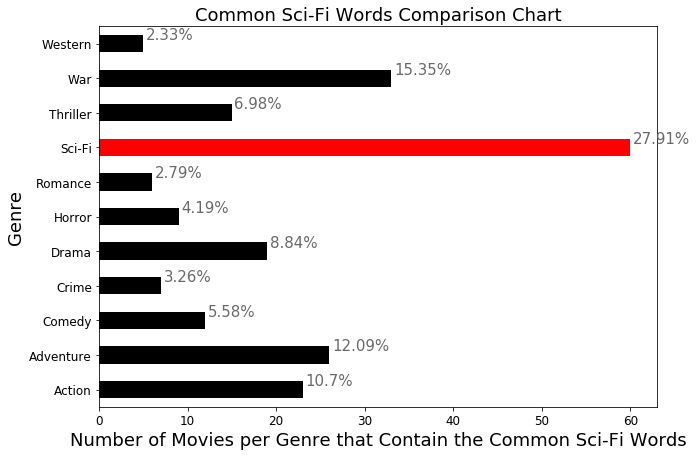

In [6]:
common_scifiwords = ["world", "future", "planet", "crew", "earth", "time", "space", "past", "team"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_scifiwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Sci-Fi Synopsis Words: future, planet, world, crew, earth, time,"+ 
      "space, past, team"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","black","black"]
c[7] = "red"
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Sci-Fi Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Sci-Fi Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for sci-fi movie synopsis, we were able to look and see what words were most common in the Sci-Fi movie synopsis. Once we received the most common Sci-Fi words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the results showed that the Sci-Fi genre had the highest Sci-Fi Synopsis words, which was as expected, but War and Action were the second highest. 

# Most Common Words in Drama

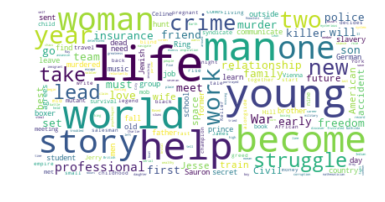

In [23]:
drama_series = movie_df[movie_df["Genre"] == "Drama"]
drama_text=""
for text in drama_series.Synopsis:
    drama_text+=text
wordcloud = WordCloud(background_color="white").generate(drama_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
drama_movies_df = movie_df[movie_df["Genre"] == "Drama"]

bag_of_words_drama = (
    drama_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_drama = pd.DataFrame(list(bag_of_words_drama)).fillna(0)
tf_drama.sum().sort_values()[-50:]

through           5.0
work              5.0
professional      5.0
during            5.0
other             6.0
years             6.0
own               6.0
s                 6.0
crime             6.0
new               6.0
against           6.0
but               7.0
two               7.0
become            7.0
be                7.0
woman             8.0
one               8.0
have              8.0
at                9.0
story             9.0
him               9.0
that             10.0
her              11.0
into             11.0
help             11.0
man              12.0
young            12.0
they             12.0
world            12.0
when             13.0
as               13.0
their            14.0
life             15.0
who              15.0
after            15.0
by               15.0
he               17.0
for              18.0
with             20.0
from             20.0
on               22.0
is               28.0
an               28.0
in               57.0
his              61.0
of        

According to this TF for drama movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the drama movie sysnopsis are: "life", "man", "story", "woman", "against", "crime", "years", "struggle", "professional", "work", "help"

Common Drama Synopsis Words: life, man, story, woman, against,crime, years, struggle, professional, work, help


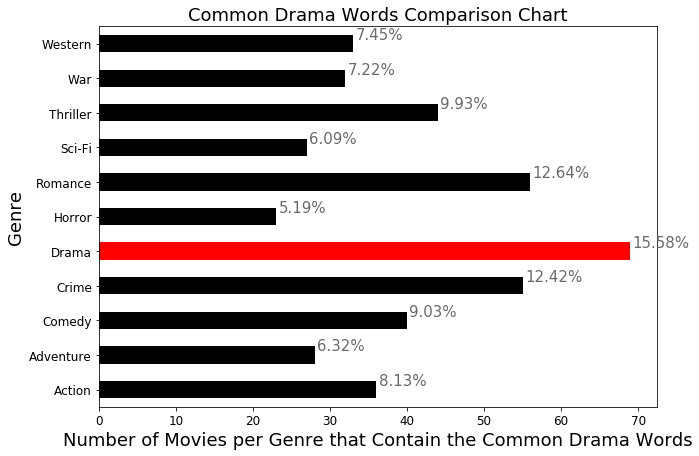

In [11]:
common_dramawords = ["life", "man", "story", "woman", "against", "crime", "years",
                "struggle", "professional", "work", "help"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_dramawords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Drama Synopsis Words: life, man, story, woman, against,"+ 
      "crime, years, struggle, professional, work, help"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","black","black"]
c[4] = "red"
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Drama Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Drama Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for drama movie synopsis, we were able to look and see what words were most common in the Drama movie synopsis. Once we received the most common Drama words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the results showed that the Drama genre had the highest Drama Synopsis words, which was as expected, but the Crime and Romance Genres Synopsis also were pretty close to the Drama Synopsis at around 12.5% each. 

# Most Common Words in Crime

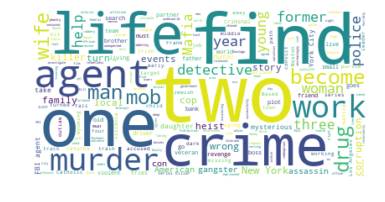

In [24]:
crime_series = movie_df[movie_df["Genre"] == "Crime"]
crime_text=""
for text in crime_series.Synopsis:
    crime_text+=text
wordcloud = WordCloud(background_color="white").generate(crime_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
crime_movies_df = movie_df[movie_df["Genre"] == "Crime"]

bag_of_words_crime = (
    crime_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_crime = pd.DataFrame(list(bag_of_words_crime)).fillna(0)
tf_crime.sum().sort_values()[-50:]

york         6.0
wrong        6.0
former       6.0
young        6.0
mafia        6.0
woman        7.0
up           7.0
against      7.0
down         7.0
wife         7.0
police       7.0
murder       8.0
himself      8.0
mob          8.0
work         8.0
man          8.0
them         8.0
into         8.0
killer       8.0
while        8.0
him          9.0
crime       10.0
after       10.0
finds       10.0
life        10.0
fbi         11.0
one         12.0
he          12.0
that        12.0
agent       13.0
their       14.0
two         14.0
who         15.0
her         16.0
from        17.0
when        18.0
by          19.0
with        19.0
for         20.0
as          20.0
on          22.0
is          25.0
an          31.0
in          50.0
his         62.0
to          69.0
of          78.0
and         86.0
the        139.0
a          163.0
dtype: float64

According to this TF for crime movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the crime movie sysnopsis are: "fbi","crime", "killer", "mob", "murder", "police", "mafia", "york", "drug", "agent"

Common Crime Synopsis Words: fbi, crime, killer, mob, murder,police, mafia, york, drug, agent


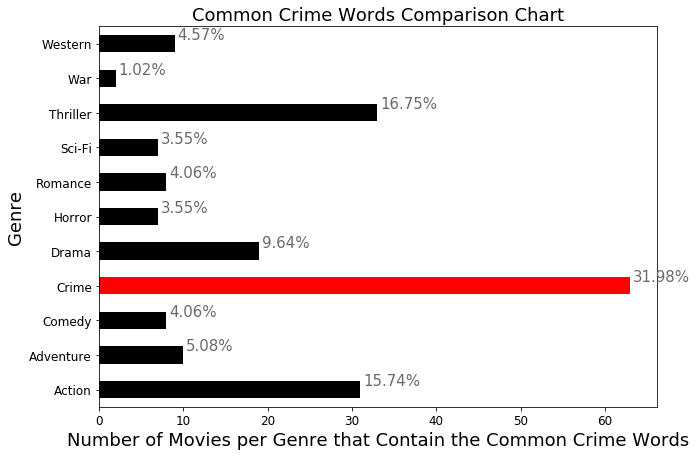

In [15]:
common_crimewords = ["fbi","crime", "killer", "mob", "murder", "police", 
                "mafia", "york", "drug", "agent"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_crimewords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Crime Synopsis Words: fbi, crime, killer, mob, murder,"+ 
      "police, mafia, york, drug, agent"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","black","black"]
c[3] = "red"
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Crime Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Crime Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for crime movie synopsis, we were able to look and see what words were most common in the Crime movie synopsis. Once we received the most common Crime words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the results showed that the Crime genre had the highest Crime Synopsis words, which was as expected, but Thriller and Action were the second highest. This makes sense because a lot of crime movies are also thriller or action movies.

# Most Common Words in Thriller

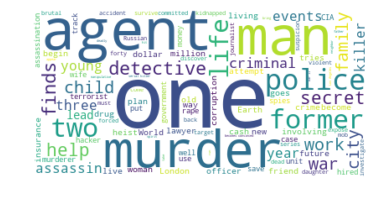

In [27]:
thriller_series = movie_df[movie_df["Genre"] == "Thriller"]
thriller_text=""
for text in thriller_series.Synopsis:
    thriller_text+=text
wordcloud = WordCloud(background_color="white").generate(thriller_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
thriller_movies_df = movie_df[movie_df["Genre"] == "Thriller"]

bag_of_words_thriller = (
    thriller_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_thriller= pd.DataFrame(list(bag_of_words_thriller)).fillna(0)
tf_thriller.sum().sort_values()[-50:]

child          6.0
becomes        6.0
up             7.0
him            7.0
under          7.0
them           7.0
help           7.0
down           7.0
detective      7.0
be             8.0
killer         8.0
himself        8.0
while          8.0
former         8.0
life           8.0
into           8.0
are            8.0
finds          8.0
two            9.0
war            9.0
murder         9.0
has            9.0
during         9.0
after         10.0
against       10.0
man           10.0
agent         10.0
police        10.0
their         12.0
her           12.0
that          13.0
he            15.0
one           16.0
when          16.0
as            16.0
for           17.0
with          18.0
from          19.0
who           20.0
by            23.0
on            27.0
an            32.0
is            35.0
in            49.0
his           52.0
and           56.0
of            79.0
to            91.0
the          112.0
a            187.0
dtype: float64

According to this TF for thriller movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the thriller movie sysnopsis are: "child", "detective", "agent", "police","murder","war", "killer", "criminal","finds", "against"

Common Thriller Synopsis Words: child, detective, agent, police, criminal,murder, war, killer, and fin ds


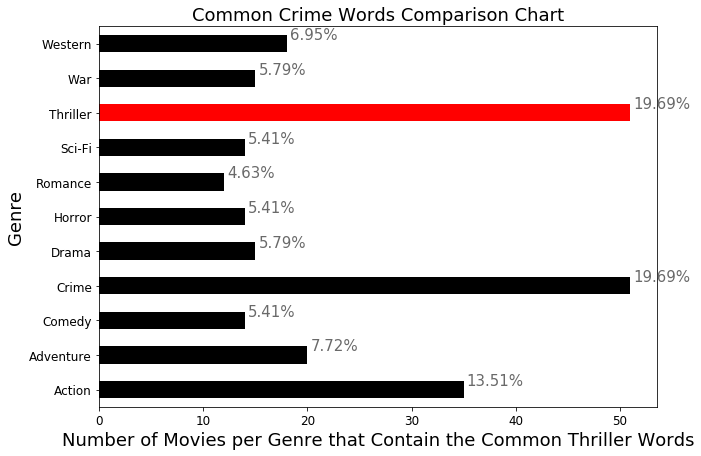

In [19]:
common_thrillerwords = ["child", "detective", "agent", "police","murder","war" 
                "killer", "criminal","finds", "against"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_thrillerwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Thriller Synopsis Words: child, detective, agent, police, criminal,"+ 
      "murder, war, killer, against, and finds"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","black","black"]
c[8] = "red"
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Thriller Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Crime Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for thriller movie synopsis, we were able to look and see what words were most common in the Thriller movie synopsis. Once we received the most common Thriller words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the results showed that the Thriller genre had the highest Thriller Synopsis words, tied with Crime movies. This is probably because a lot of Thriller movies are also Crime movies. This also leads us to believe that it may be difficult to predict the Thriller genre movies correctly based on synopsis text. 

# Most Common Words in Comedy

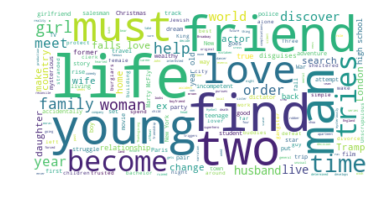

In [4]:
comedy_series = movie_df[movie_df["Genre"] == "Comedy"]
comedy_text=""
for text in comedy_series.Synopsis:
    comedy_text+=text
wordcloud = WordCloud(background_color="white").generate(comedy_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
comedy_movies_df = movie_df[movie_df["Genre"] == "Comedy"]

bag_of_words_comedy = (
    comedy_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_comedy= pd.DataFrame(list(bag_of_words_comedy)).fillna(0)
tf_comedy.sum().sort_values()[-50:]

school       5.0
high         5.0
they         5.0
help         6.0
woman        6.0
family       6.0
time         6.0
are          6.0
at           6.0
new          6.0
friend       6.0
girl         6.0
becomes      6.0
falls        6.0
into         7.0
get          7.0
that         7.0
up           7.0
while        7.0
finds        8.0
tries        8.0
who          9.0
man          9.0
must         9.0
himself      9.0
as           9.0
young       10.0
two         10.0
when        11.0
from        11.0
on          12.0
love        12.0
he          13.0
after       13.0
their       14.0
by          14.0
life        15.0
but         15.0
is          16.0
for         20.0
her         24.0
an          28.0
with        35.0
of          51.0
and         52.0
his         61.0
in          65.0
to          81.0
the         88.0
a          139.0
dtype: float64

According to this TF for comedy movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the comedy movie sysnopsis are: "school","high","family","love","tries", "falls","time", "friend"

Common Comedy Synopsis Words: school, high, family, tries, falls, time


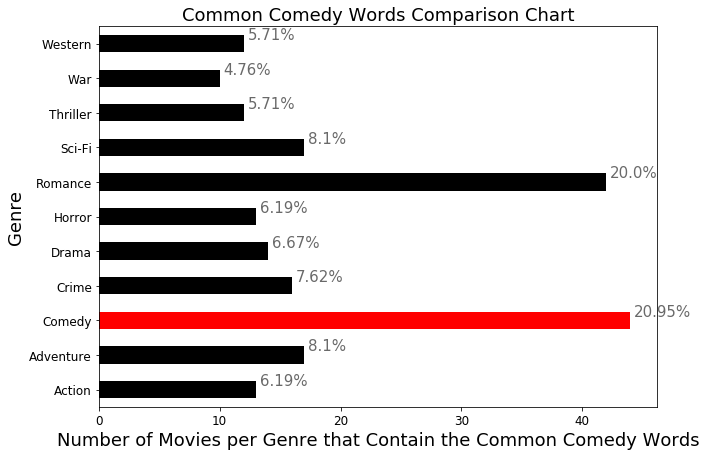

In [25]:
common_comedywords = ["school","high","family","love","tries",
                "falls","time", "friend"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_comedywords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Comedy Synopsis Words: school, high, family, tries,"+
      " falls, time, friend"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","black","black"]
c[2] = "red"
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Comedy Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Comedy Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for comedy movie synopsis, we were able to look and see what words were most common in the Comedy movie synopsis. Once we received the most common Comedy words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the results showed that the Comedy genre had the highest Comedy Synopsis words, as expected. But, Romance movies came really close with 20%. This is probably because a lot of Comedy movies are also Romance movies, and these movies are informally called Rom-Coms. This also leads us to believe that it may be difficult to predict the Comedy genre movies correctly based on synopsis text.  

# Most Common Words in War

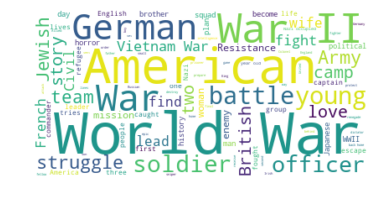

In [13]:
war_series = movie_df[movie_df["Genre"] == "War"]
war_text=""
for text in war_series.Synopsis:
    war_text+=text
wordcloud = WordCloud(background_color="white").generate(war_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
war_movies_df = movie_df[movie_df["Genre"] == "War"]

bag_of_words_war = (
    war_movies_df["Synopsis"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_war= pd.DataFrame(list(bag_of_words_war)).fillna(0)
tf_war.sum().sort_values()[-50:]

wife           6.0
two            6.0
officer        6.0
struggles      6.0
that           6.0
home           6.0
french         6.0
fight          6.0
while          7.0
into           7.0
when           7.0
story          7.0
are            7.0
camp           7.0
team           7.0
british        7.0
vietnam        8.0
jewish         8.0
against        9.0
at             9.0
army           9.0
her            9.0
battle        11.0
young         11.0
from          11.0
german        12.0
after         12.0
us            12.0
their         13.0
who           13.0
as            13.0
he            15.0
by            16.0
american      16.0
ii            16.0
is            16.0
with          21.0
on            22.0
for           22.0
world         24.0
an            27.0
during        29.0
his           34.0
war           54.0
and           64.0
to            67.0
in            70.0
of           105.0
a            137.0
the          158.0
dtype: float64

According to this TF for comedy movies above, it seems like the most common words (if we take out common words like "the", "and", etc.) in the comedy movie sysnopsis are: "war", "american", "german", "battle", "army", "against", "british", "fight", "french", "soldier","officer", "jewish", "team","camp", "vietnam", "home", "against"

Common War Synopsis Words: war, american, german, army, battle,british, fight, french, soldier, officer, jewish, team, camp,vietnam, home, against


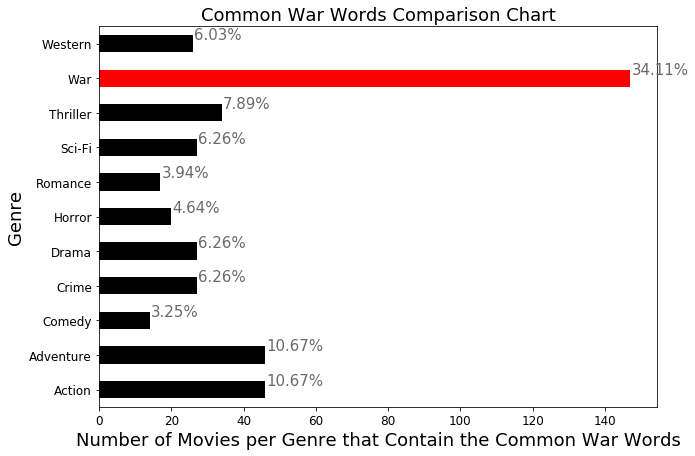

In [30]:
common_warwords = ["war", "american", "german", "battle", "army", "against"
                "british", "fight", "french", "soldier","officer", "jewish", "team","camp", "vietnam",
                "home", "against"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_warwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common War Synopsis Words: war, american, german, army, battle,"+ 
      "british, fight, french, soldier, officer, jewish, team, camp,"+
      "vietnam, home, against"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","black","black"]
c[9] = "red"
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common War Words"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common War Words Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the word frequencies for war movie synopsis, we were able to look and see what words were most common in the War movie synopsis. Once we received the most common War words, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the results showed that the War genre had the highest number of words from the common War words synopsis as expected. The surprising part was how distinct the War genre words were and how specific they seems to be as the rest of the genres have very few words in common with War Synopsis words.  

## Overall Conclusion
After looking at all the results above, we find that the common words for each genre occur mostly only in that genre. Hence, we can conclude that each genre has common words in their synopsis and there is a correlation between the words that occur in the synopsis and the movie genre.